# Objective 
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain 85% to 95% accuracy.


Attribute Information:
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.
 
	Name	Data Type	Measurement	Description
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable


In [1]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\vicente\anaconda3\lib\site-packages (0.7.0)


In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#pip install pydotplus
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn import metrics
#from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

C:\Users\Vicente\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
con_df = pd.read_csv("concrete.csv")

## • Exploratory Data Quality Report Reflecting the Following:


	1. Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks)


In [4]:
con_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29
5,255.00,0.00,0.00,192.00,0.00,889.80,945.00,90,21.86
6,166.80,250.20,0.00,203.50,0.00,975.60,692.60,7,15.75
7,251.40,0.00,118.30,188.50,6.40,"1,028.40",757.70,56,36.64
8,296.00,0.00,0.00,192.00,0.00,"1,085.00",765.00,28,21.65
9,155.00,184.00,143.00,194.00,9.00,880.00,699.00,28,28.99


In [5]:
con_df.shape

(1030, 9)

In [6]:
con_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


In [7]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
con_df.corr()
#Based on the correlation factors cement and strength have the highest correlation

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08,0.50
slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04,0.13
ash,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15,-0.11
water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28,-0.29
superplastic,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19,0.37
coarseagg,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00,-0.16
fineagg,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16,-0.17
age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00,0.33
strength,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,1.00


In [9]:
con_df.isnull().values.any()
#No null values

False

In [10]:
con_df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [11]:
con_df.nunique() 
#All unique values

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [12]:
#All the next plots are to look for outliers in the data

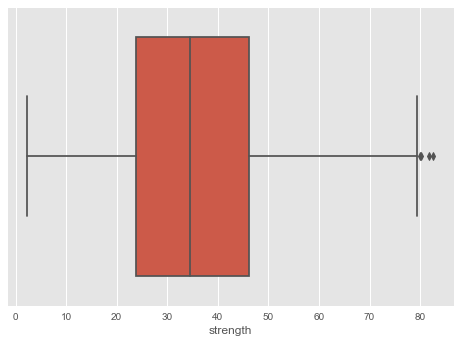

In [13]:
sns.boxplot(x=con_df["strength"])

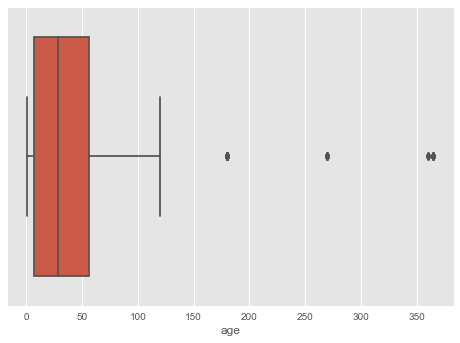

In [14]:
sns.boxplot(x=con_df["age"])

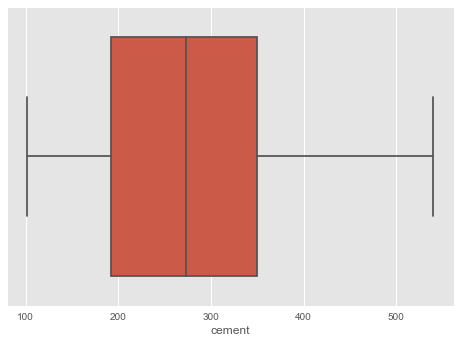

In [15]:
sns.boxplot(x=con_df["cement"])

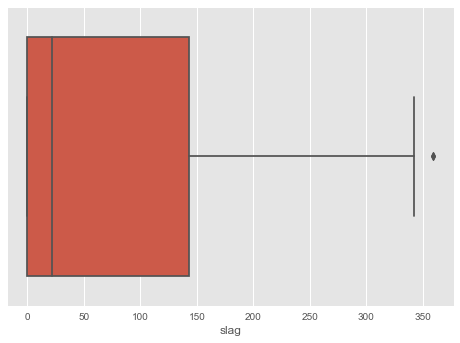

In [16]:
sns.boxplot(x=con_df["slag"])

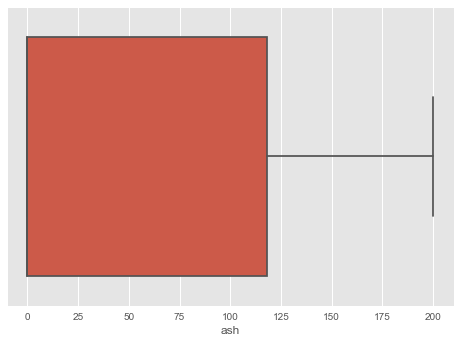

In [17]:
sns.boxplot(x=con_df["ash"])

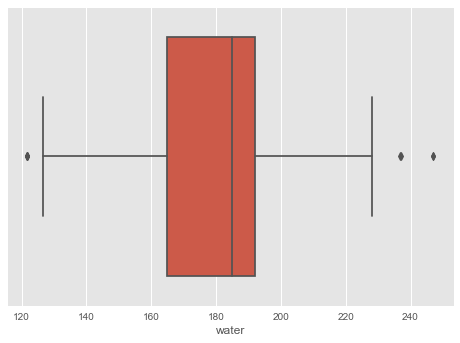

In [18]:
sns.boxplot(x=con_df["water"])

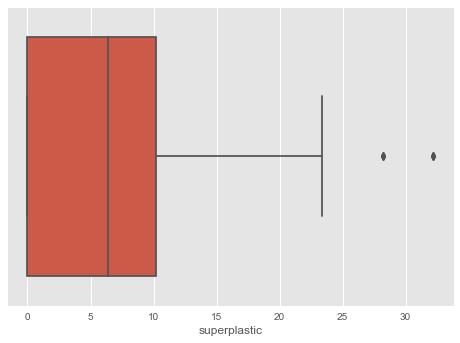

In [19]:
sns.boxplot(x=con_df["superplastic"])

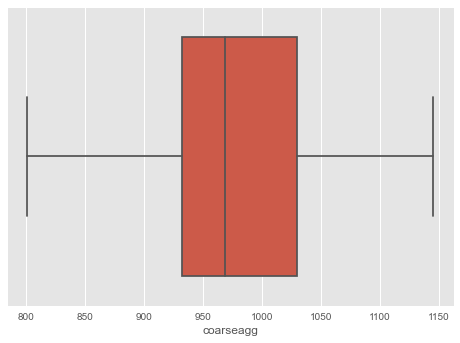

In [20]:
sns.boxplot(x=con_df["coarseagg"])

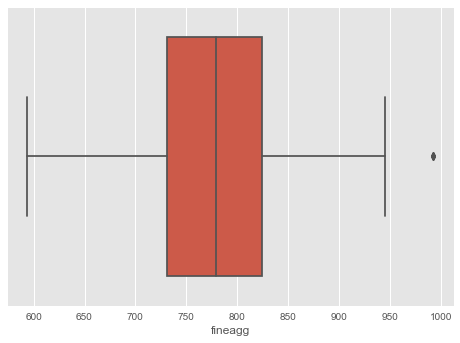

In [21]:
sns.boxplot(x=con_df["fineagg"])

In [22]:
#Based on the box plots there are not enough outliers to impact the analysis

In [23]:
pd.DataFrame( con_df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
cement,0
slag,0
ash,0
water,0
superplastic,0
coarseagg,0
fineagg,0
age,0
strength,0


	2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)


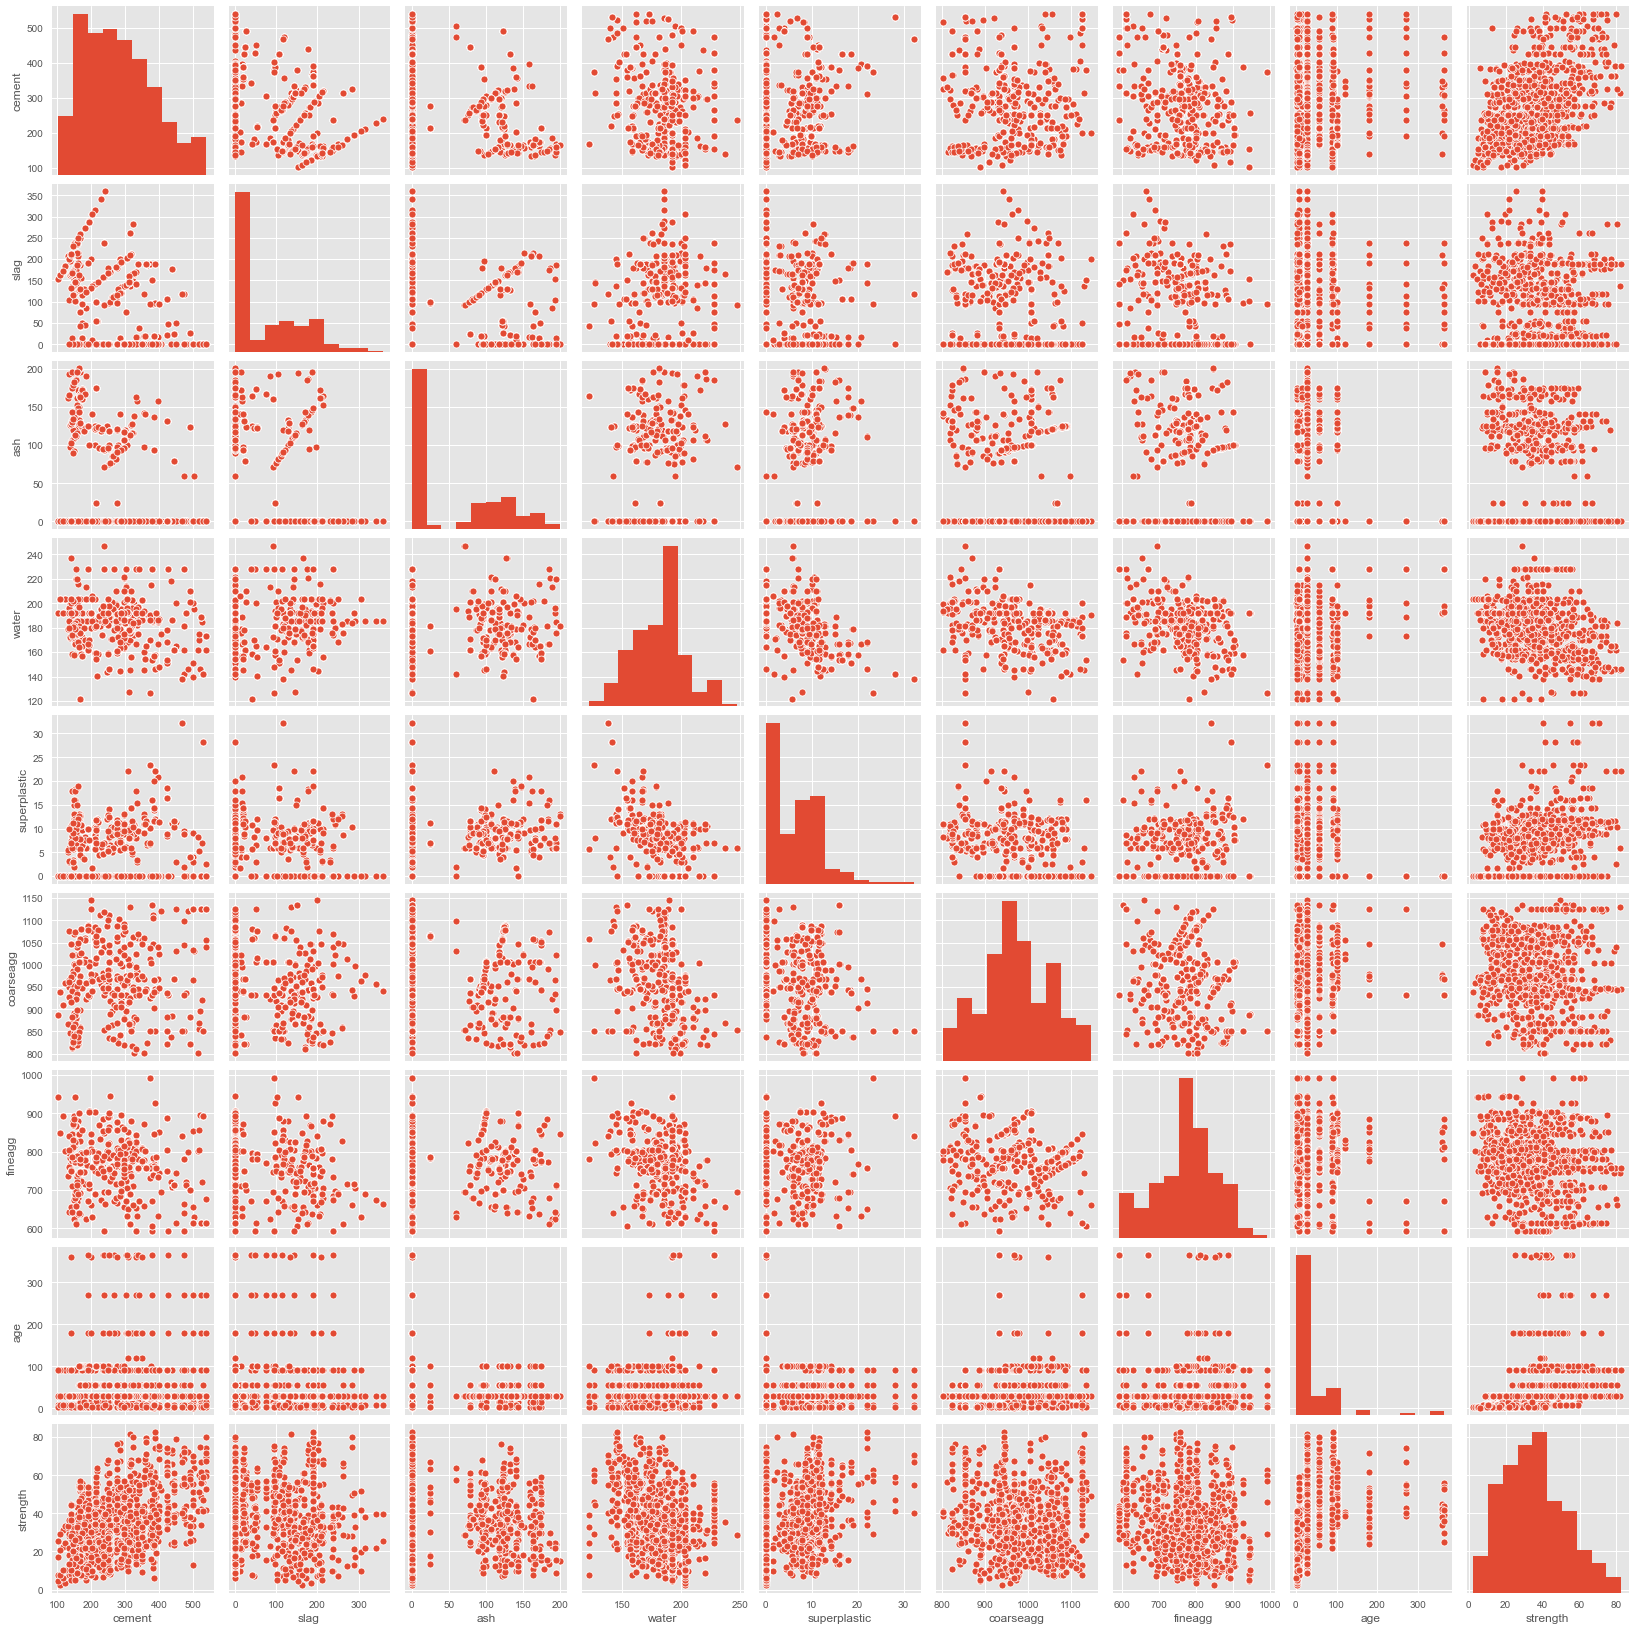

In [24]:
#Pairplot to check for relationships
sns.pairplot(con_df)

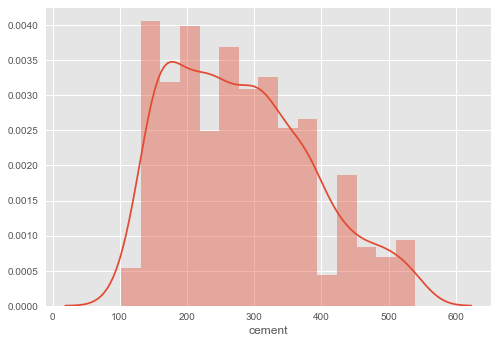

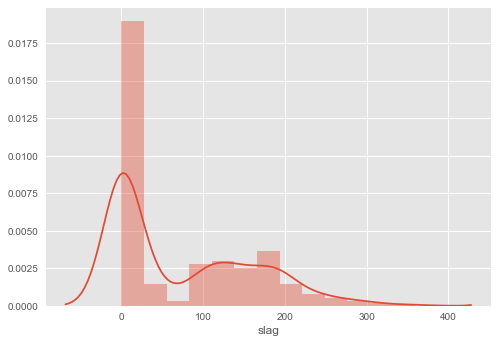

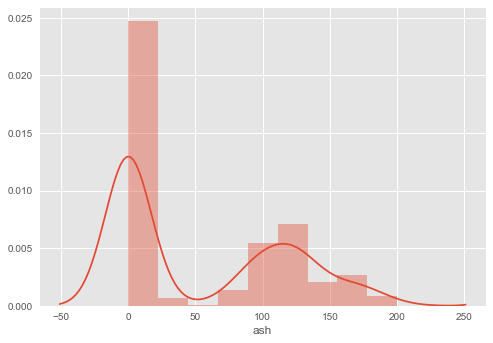

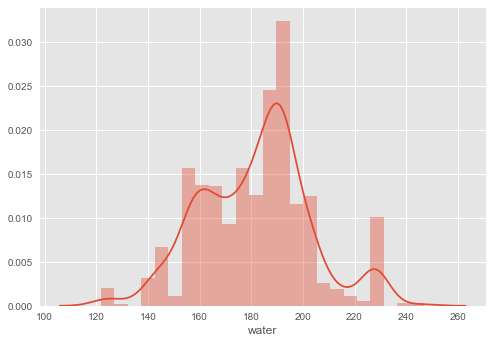

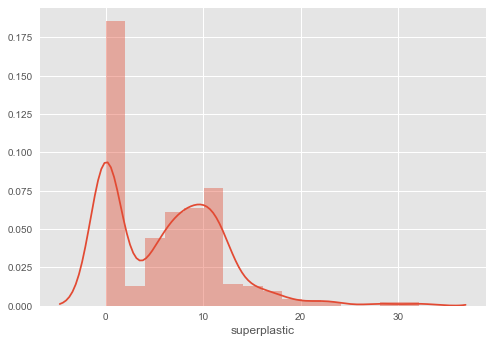

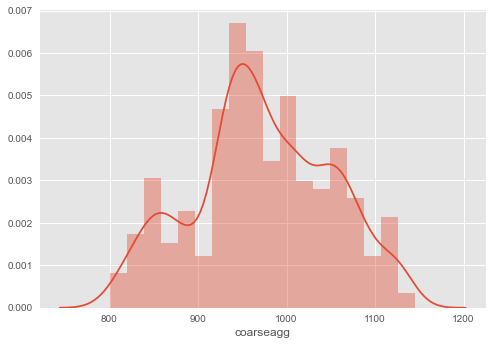

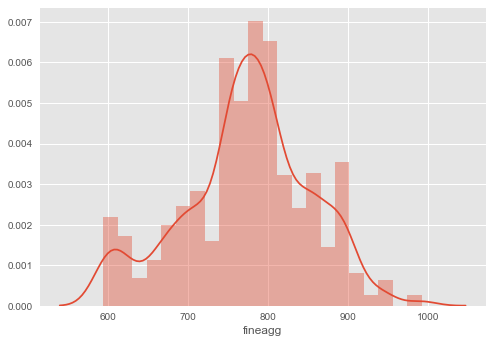

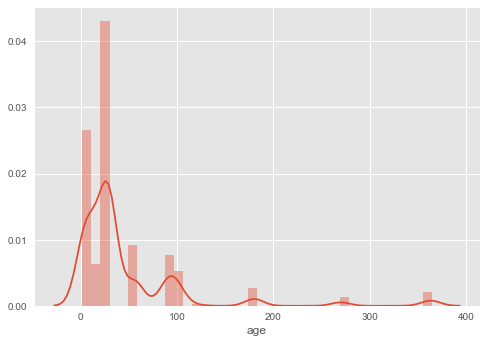

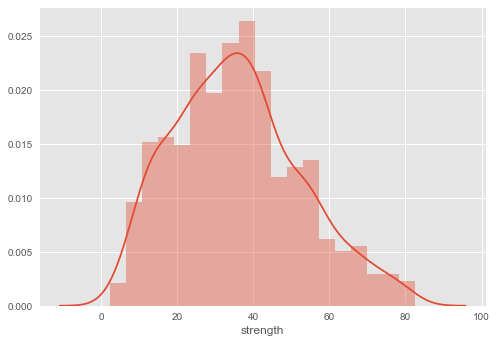

In [25]:
for i in ['cement','slag','ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']:
    sns.distplot(con_df[i])
    plt.show()
    #some of the plots are skewed to the left

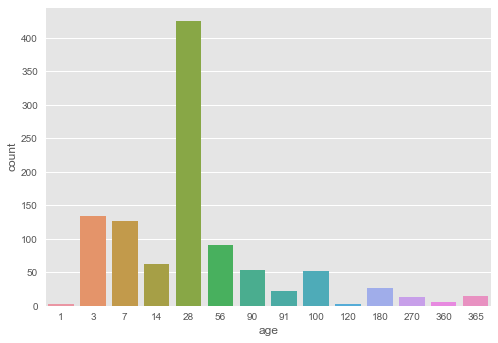

In [26]:
for i in ['age']:
    sns.countplot(con_df[i])
    plt.show()
    #The majority of the age for most formulas is on the early days meaning that is not aged for a long time

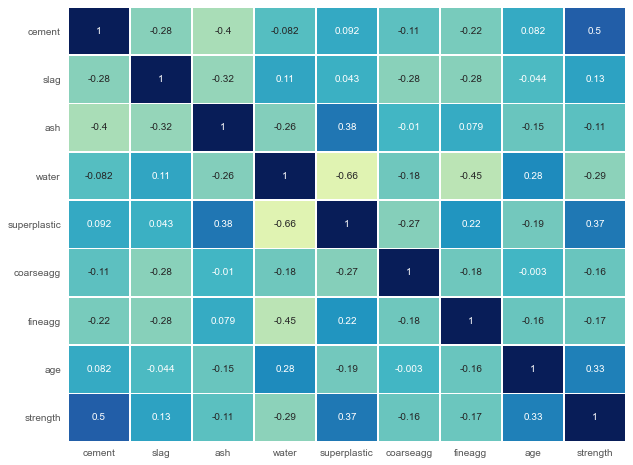

In [27]:
plt.figure(figsize=(10,8))

sns.heatmap(con_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()
#highest correlation is between cement and strength

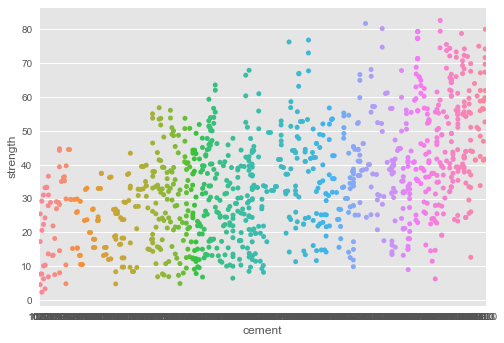

In [28]:
sns.stripplot(con_df['cement'], con_df['strength'])
plt.show()
#These are the only ones with the highest linear correlation

In [29]:
#The graph above shows the only relationship that looks linear out of all the plots above. This shows that as more cement kg * m3 the strength increases.

In [30]:
#levels of Y variable
con_df['strength'].value_counts()

33.40    6
79.30    4
41.05    4
71.30    4
35.30    4
        ..
61.23    1
26.31    1
38.63    1
47.74    1
15.75    1
Name: strength, Length: 845, dtype: int64

	3. Feature Engineering techniques(10 marks)


		1. Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.


In [31]:
#looking at the dataframe, values with a value of zero should remain zero since it is part of the formula to create the mixture of concrete.

In [32]:
scaler = StandardScaler()
cols = ['cement','slag','ash','water','superplastic','coarseagg', 'fineagg', 'age']
con_df[cols] = scaler.fit_transform(con_df[cols])
con_df.head()
#Using a scaler for all attributes

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.34,1.60,-0.85,1.03,-1.04,-0.01,-0.31,-0.28,29.89
1,-1.07,-0.37,1.10,-1.09,0.77,1.39,0.28,-0.50,23.51
2,-0.30,-0.86,0.65,0.27,-0.12,-0.21,1.09,-0.28,29.22
3,-0.15,0.47,-0.85,2.18,-1.04,-0.53,-1.29,-0.28,45.85
4,-1.21,1.27,-0.85,0.55,0.48,0.96,-0.96,-0.28,18.29


		2. Get the data model ready and do a train test split.


In [33]:
x = con_df.drop('strength', axis=1)
y = con_df[['strength']]

		3. Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=0)

In [35]:
x_train.shape, x_test.shape

((721, 8), (309, 8))

In [36]:
x_train.dtypes
#checking data types for attributes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age             float64
dtype: object

In [37]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
#Used linear regression for this model

LinearRegression()

In [38]:
# Train R^2
print(regression_model.score(x_train, y_train))

0.6245192848718453


In [39]:
# Test R^2
print(regression_model.score(x_test, y_test))

0.5847971375840111


In [40]:
# Train MSE
predictedST = regression_model.predict(x_train)
print(mean_squared_error(predictedST, y_train))

105.98075148230006


In [41]:
# Test MSE
predictedST = regression_model.predict(x_test)
print(mean_squared_error(predictedST, y_test))

112.13064750448623


In [42]:
x_train.head(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
772,-0.66,-0.86,1.05,-0.06,-0.08,1.09,0.07,-0.50
997,-1.12,1.03,1.15,0.72,0.30,-0.15,-1.65,-0.28


## Creating the Model and Tuning It:

Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)

In [43]:
# Evaluate using Cross Validation
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [44]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)

score3 = dt.score(x_test, y_test)
pred = dt.predict(x_test)

print(f"Decision tree acccuracy score: {score3}")

Decision tree acccuracy score: 0.8651206208586271


In [45]:
#Store the accuracy results for each model in a dataframe for final comparison
lgresultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': score3})
lgresultsDf = lgresultsDf[['Method', 'accuracy']]
lgresultsDf

,Method,accuracy
0,Decision Tree,0.87


In [46]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)

score4 = rf.score(x_test, y_test)

print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.9078008358930041


In [47]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': score4})
lgresultsDf = pd.concat([lgresultsDf, tempResultsDf])
lgresultsDf = lgresultsDf[['Method', 'accuracy']]
lgresultsDf

,Method,accuracy
0,Decision Tree,0.87
0,Random Forest,0.91


In [48]:
#Bagging Classifier
from sklearn.ensemble import BaggingRegressor

bgcl = BaggingRegressor(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(x_train, y_train)

In [49]:
score5 = bgcl.score(x_test, y_test)
pred = bgcl.predict(x_test)

print(f"Bagging Classifier acccuracy score: {score5}")

Bagging Classifier acccuracy score: 0.8987455719986341


In [50]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': score5})
lgresultsDf = pd.concat([lgresultsDf, tempResultsDf])
lgresultsDf = lgresultsDf[['Method', 'accuracy']]
lgresultsDf

,Method,accuracy
0,Decision Tree,0.87
0,Random Forest,0.91
0,Bagging,0.90


In [51]:
#Adaboost
from sklearn.ensemble import AdaBoostRegressor
abcl = AdaBoostRegressor(n_estimators = 50, learning_rate=0.1, random_state=22)
abcl = abcl.fit(x_train, y_train)

In [52]:
score6 = abcl.score(x_test, y_test)
pred = abcl.predict(x_test)

print(f"Adaboost acccuracy score: {score6}")

Adaboost acccuracy score: 0.7014168016404557


In [72]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': score6})
lgresultsDf = pd.concat([lgresultsDf, tempResultsDf])
lgresultsDf = lgresultsDf[['Method', 'accuracy']]
lgresultsDf

,Method,accuracy
0,Decision Tree,0.87
0,Random Forest,0.91
0,Bagging,0.90
0,Adaboost,0.90
0,Adaboost,0.70


In [54]:
#Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score
#For Decision Tree 
scoredt = cross_val_score(dt, x, y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {scoredt}')

Cross validation score of Decision tree = 0.8695358459320781


In [56]:
#Store the accuracy results for each model in a dataframe for final comparison
cvresultsDf = pd.DataFrame({'Cross Validation Method':['Decision Tree'], 'accuracy': scoredt})
cvresultsDf = cvresultsDf[['Cross Validation Method', 'accuracy']]
cvresultsDf

,Cross Validation Method,accuracy
0,Decision Tree,0.87


In [57]:
#Random Forest 
scorerf = cross_val_score(rf, x, y, cv = 10).mean()
print(f'Cross validation score of Random forest = {scorerf}')

Cross validation score of Random forest = 0.9170299903012689


In [58]:
cvtempResultsDf = pd.DataFrame({'Cross Validation Method':['Random Forest'], 'accuracy': scorerf})
cvresultsDf = pd.concat([cvresultsDf, cvtempResultsDf])
cvresultsDf = cvresultsDf[['Cross Validation Method', 'accuracy']]
cvresultsDf

,Cross Validation Method,accuracy
0,Decision Tree,0.87
0,Random Forest,0.92


In [59]:
#Bagging
scorebg = cross_val_score(bgcl, x, y, cv = 10).mean()
print(f'Cross validation score of Random forest = {scorebg}')

Cross validation score of Random forest = 0.9081893834264282


In [60]:
cvtempResultsDf = pd.DataFrame({'Cross Validation Method':['Bagging'], 'accuracy': scorebg})
cvresultsDf = pd.concat([cvresultsDf, cvtempResultsDf])
cvresultsDf = cvresultsDf[['Cross Validation Method', 'accuracy']]
cvresultsDf

,Cross Validation Method,accuracy
0,Decision Tree,0.87
0,Random Forest,0.92
0,Bagging,0.91


In [61]:
#Adaboost
scoreab = cross_val_score(abcl, x, y, cv = 10).mean()
print(f'Cross validation score of Random forest = {scoreab}')

Cross validation score of Random forest = 0.7219338027974663


In [62]:
cvtempResultsDf = pd.DataFrame({'Cross Validation Method':['Adaboost'], 'accuracy': scoreab})
cvresultsDf = pd.concat([cvresultsDf, cvtempResultsDf])
cvresultsDf = cvresultsDf[['Cross Validation Method', 'accuracy']]
cvresultsDf

,Cross Validation Method,accuracy
0,Decision Tree,0.87
0,Random Forest,0.92
0,Bagging,0.91
0,Adaboost,0.72


In [63]:
#Based on the results above, Random Forest Regressor provides the best results out of the 4 models run 

Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

In [64]:
#For this section the best two algorithms will be used for Grid Search, Random Forest and Bagging.

In [65]:
#Grid Search CV for Random Forest 
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(x, y)

clf.best_params_


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   14.7s finished


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [66]:
#Random Forest algorithm with best parameters from Grid Search
rfcv = RandomForestRegressor(bootstrap= True,
 max_depth= 40,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 100)


scorerfcv = cross_val_score(rfcv, x, y, cv = 5).mean()


scorerfcv
    

0.9095207177616148

In [67]:
#Store the accuracy results for each model in a dataframe for final comparison
GridcvresultsDf = pd.DataFrame({'Grid Search Method':['Random Forest CV'], 'accuracy': scorerfcv})
GridcvresultsDf = GridcvresultsDf[['Grid Search Method', 'accuracy']]
GridcvresultsDf

,Grid Search Method,accuracy
0,Random Forest CV,0.91


In [68]:
#Bagging
from sklearn.neighbors import KNeighborsRegressor
params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0, ],
          'max_features': [0.5,1.0,],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(x_train, y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(x_train, y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(x_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   19.4s finished


Train R^2 Score : 0.984
Test R^2 Score : 0.903
Best R^2 Score Through Grid Search : 0.892
Best Parameters :  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}


In [69]:
#Bagging algorithm with best parameters from Grid Search
bgcvt = BaggingRegressor (base_estimator= None,
          n_estimators= 100,
          max_samples= 1.0,
          max_features= 1.0,
          bootstrap= True,
          bootstrap_features= False)

scoregbcv = cross_val_score(bgcvt, x, y, cv = 5).mean()

scoregbcv

0.9073230266985958

In [70]:
GridcvtempResultsDf = pd.DataFrame({'Grid Search Method':['Bagging CV'], 'accuracy': scoregbcv})
GridcvresultsDf = pd.concat([GridcvresultsDf, GridcvtempResultsDf])
GridcvresultsDf = GridcvresultsDf[['Grid Search Method', 'accuracy']]
GridcvresultsDf

,Grid Search Method,accuracy
0,Random Forest CV,0.91
0,Bagging CV,0.91


In [71]:
#Based on the results above both Random Forest and Baggin with Grid Search both provide the same results. 
#The best next step would be to run both models again but using the Random Search to look for better results. 